$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$
# Assignment #1 - Linear Regression


<font color="blue"> Meghana Setty</font>


# Introduction

The objective of the assignment is get to know the patterns of the dataset we are working on using linear regression and how the linear regression works.

I am accomplishing this objective by applying the linear models on my AmesHousing dataset.

# Data


### Introduction of Data

The Ames Housing Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). There are total of 2390 instances.

### Features of Data

The most relevent features that effect the housing data are as follows:

1. Lot Frontage (Continuous): Linear feet of street connected to property
2. Lot Area (Continuous): Lot size in square feet
3. Street (Nominal): Type of road access to property
4. Alley (Nominal): Type of alley access to property
5. Lot Shape (Ordinal): General shape of property
6. Land Contour (Nominal): Flatness of the property
7. Utilities (Ordinal): Type of utilities available
8. Neighborhood (Nominal): Physical locations within Ames city limits (map available)
9. Year Built (Discrete): Original construction date
10. Total Bsmt SF (Continuous): Total square feet of basement area
11. 1st Flr SF (Continuous): First Floor square feet
12. 2nd Flr SF (Continuous)	: Second floor square feet
13. Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)
14. Gr Liv Area (Continuous): Above grade (ground) living area square feet
15. Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
16. Kitchen (Discrete): Kitchens above grade
17. Pool Area (Continuous): Pool area in square feet
18. Mo Sold (Discrete): Month Sold (MM)
19. Yr Sold (Discrete): Year Sold (YYYY)
20. Sale Type (Nominal): Type of sale
21. Sale Condition (Nominal): Condition of sale
22. SalePrice (Continuous): Sale price $$

### Source of Data

The source of Ames Housing Data: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

### Plots for understanding the data

Below I have plotted the data for : 
 - Total Area vs Sale Price
         - Total Area = Aread of Basement + Area of 1st Floor + Area of 2nd Floor
         - The X axis is Total Area in SqFt
         - The Y axis is Sale Price in dollars
 - Ground Living Area vs Sale Price
         - The x axis is Ground Living Area in SqFt
         - The Y axis is Sale Price in dollars
 

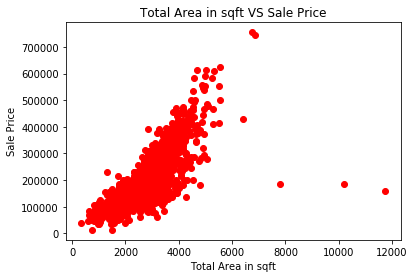

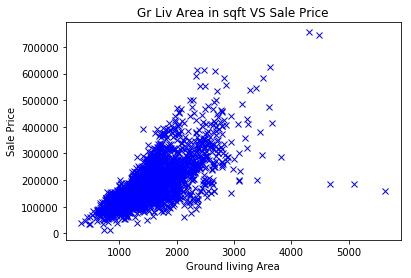

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('AmesHousing.xls')
TotalSqFt = np.array(df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'])
plt.xlabel('Total Area in sqft')
plt.ylabel('Sale Price')
plt.title('Total Area in sqft VS Sale Price')
plt.plot(TotalSqFt,df['SalePrice'],'or')
plt.show()

plt.xlabel('Ground living Area')
plt.ylabel('Sale Price')
plt.title('Gr Liv Area in sqft VS Sale Price')
plt.plot(df['Gr Liv Area'],df['SalePrice'],'xb')
plt.show()

### Preliminary Observation

1. From the observation of the above graph, the SalePrice increasing linearly with Total Area and Ground Living Area
2. But, there are three exceptions where the price of the house is very less for a given Ground Living Area. 
3. There are two exceptions where the price of the house is very costly for a given Ground Living Area.
4. Such data instances may be outliers and can be removed from the dataset.

### Preprocessing the Data
1. Whenever a particular feature is missing from the dataset, the value of such cell is NaN. I am checking for those values and substituing:
 - 0 when the column has integer values.(As these are sqft values we cannot substitute mean)
 - NA when the column has discrete values.
2. I am removing the 5 outliers that may deviate the path of model. 

In [2]:

if(np.any(df['Total Bsmt SF'].isnull())):
    df['Total Bsmt SF'] = np.nan_to_num(df['Total Bsmt SF'])
if(np.any(df['1st Flr SF'].isnull())):
    df['1st Flr SF'] = np.nan_to_num(df['1st Flr SF'])
if(np.any(df['2nd Flr SF'].isnull())):
    df['2nd Flr SF'] = np.nan_to_num(df['2nd Flr SF'])
if(np.any(df['Gr Liv Area'].isnull())):
    df['Gr Liv Area'] = np.nan_to_num(df['Gr Liv Area'])
if(np.any(df['SalePrice'].isnull())):
    df['SalePrice'] = np.nan_to_num(df['SalePrice'])
if(np.any(df.isnull())):
    df = df.replace(np.nan, 'NA', regex=True)


#checking if GrLibArea is way high but SalePrice is less and removing them.

df = df[~((df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 3000000))]
#checking if SalePrice is very high. Souch houses are expectional and deviate from the path.(May be extraordinary)

df = df[~(df['SalePrice'] > 7000000)]



# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [3]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

## Least Squares

### Review of Least Squares
w<sub>k</sub> is the weight of the kth feature for the target value.

In Linear Models, we introduce the feature x<sub>0</sub> of value 1. This is used for calculating the constant value for linear function.

For Least Squares, the weight of the feature can be calculated as follows:

$$
\wv^* = \arg\min_\wv \sum_{i=1}{N} \Big( f(\xv_i; \wv) - t_i \Big)^2
$$

To minimize the error cost, we need to find the derivative of the above Equation and equal it to **0**. On solving the equation we get the following :

$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \Tm  &= 0\\
\\
\Xm^\top \Xm \wv &= \Xm^\top \Tm\\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \Tm
\end{align}
$$

<b>Note: This is usually used when we want to train the complete data. When ever a new data comes it we need to again train the data along with the old data.</b>

### Implementation Details of Least Squares

For the least Squares we have the **train** method and **use** method.

**TRAIN**
1. This model requires adding an extra feature x<sub>0</sub> which has value as 1 for all the instances(xone varaible in code).
2. We then find the least squares using the Features data and the target values of the dataset.We have a function defined for it with **np.linalg.lstsq**

**USE**
1. This function is used to calculate the target values, given the features and weight of the instance by using the dotproduct (x<sub>0</sub> should be addded as the 0th column).

$$
\begin{align}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$


In [4]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        N = X.shape[0]
        Xone = self.add_ones(X)
        self.w = np.linalg.lstsq(Xone.T @ Xone,Xone.T @ T,rcond=-1)[0]
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        Xone = self.add_ones(X)
        #Xone = np.hstack((np.ones((N,1)),X.reshape((N,-1))))
        return Xone @ self.w

## Least Mean Squares

### Review of Least Mean Squares
w<sub>k</sub> is the weight of the kth feature for the target value.

In Linear Models, we introduce the feature x<sub>0</sub> of value 1. This is used for calculating the constant value for linear function.

**Unlike least Squares**, in LMS, we dont need to train the whole data whenever new data pops in. This kind of training is called *online* training.

For this, we start with an initial guess $\wv$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate.

The update rule for each sample:

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$

**NOTE: The learning rate should be appropriate. A higher value which make the data to diverge and lesser value which make the data to converge very slowly.**


### Implementation Details of Least Mean Squares

For the least Mean Squares we have the **train** method, **train_step** method and **use** method.

1. This class takes the alpha value in it's constructor.
2. Initially we need to guess the weight. So I took initial weight as 0.

**TRAIN_STEP**
1. This model requires adding an extra feature x<sub>0</sub> which has value as 1 for all the instances(xone varaible in code).
2. We check and assign the weight with correct number of zeroes(as that of the number of features).
3. We then calculate the weight vector with the about formula

**TRAIN**
1. We call the train_step for all the training rows sequentially.

**USE**
1. This function is used to calculate the target values, given the features and weight of the instance by using the dotproduct.(x<sub>0</sub> should be addded as the 0th column)

$$
\begin{align}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

2. Doing the dotproduct gives us a row vector. But the target values consists of column vector. So, I reshaped it to be column vector.

In [5]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.w = np.array([0])
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x,t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        N = x.shape[0]
        #xone = self.add_ones(x)
        xone = np.hstack((np.ones(1),x))
        N = xone.shape[0]
        if(self.w.shape[0] == 1):
            self.w = np.zeros(N)
        y = self.w @ xone
        self.w = self.w - self.alpha * (y - t) * xone
            
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        Xone = self.add_ones(X)
        #Xone = np.hstack((np.ones((X.shape[0],1)),X.reshape((N,-1))))
        y = Xone @ self.w
        Target_size = y.shape[0]
        y = np.reshape(y,(Target_size,1))
        return y

# Preliminary Test

In [6]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)
        
def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Usage Examples

In [7]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

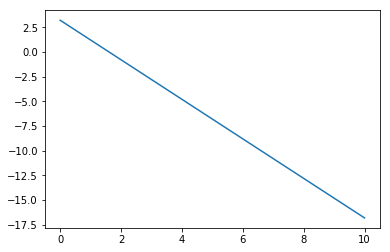

In [8]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))

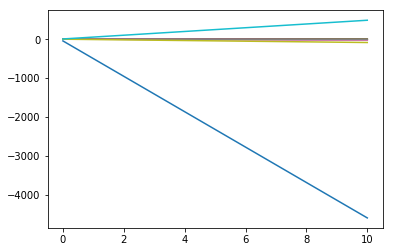

In [9]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

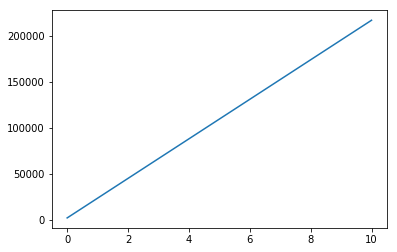

In [10]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments



#### Description

Input Features
- Total Area = Total Area of Basement + 1st Floor Area + 2nd Floor Area (Square Feet) 

Target
- Sale Price

In [11]:
df['TotalSqFt'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
df = df.sort_values(['TotalSqFt'])
TotalSqFt = np.array(df['TotalSqFt'])
SalePrice = np.array(df['SalePrice'])
SalePrice = np.reshape(SalePrice,(SalePrice.shape[0],1))
TotalSqFt = np.reshape(TotalSqFt,(TotalSqFt.shape[0],1))

In [12]:
def data_scatter(k=2930):
    plt.plot(df['SalePrice'][:k], '.')

##### Least Squares

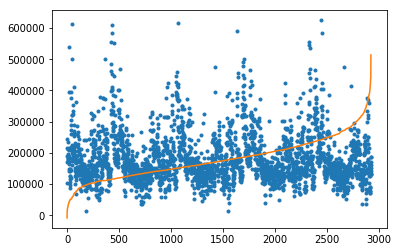

In [13]:
mydataLS = LinearRegress()

mydataLS.train(TotalSqFt,SalePrice)

data_scatter()
plt.plot(mydataLS.use(TotalSqFt))

##### Least Mean Squares

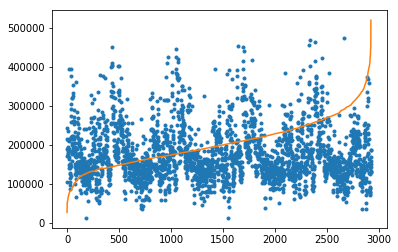

In [ ]:
import IPython.display as ipd
mydataLMS = LMS(0.000000001)
i = 0
fig = plt.figure()

for x, t,k in zip(TotalSqFt, SalePrice,range(2930)):
    plt.clf()
    data_scatter(k+1)
    mydataLMS.train_step(x, t)
    plt.plot(mydataLMS.use(TotalSqFt))
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

### Analysis and Comparision of Data

1. By the graphs and analysing , the Least Squares is faster than the Least Mean Squares
2. The Least Means square starts from a linear line and forms a s-curve(cubic curve) as more and more data pops in.
3. The learning rate is very very small(0.000000001). If we take any value greater than this, the weight goes to infinity.
4. Least Mean Squares is very good when new data comes in very often. BUt when the data changes irregularly like my data, where new data is very rare(unless and until there is someone willing to buy a house), Least Square is a good option.

# Conclusions

1. Least squares was pretty direct. But LMS was tricky, the preliminary test failed everytime, though the code was correct. I have to do the logic manually and then when I checked. I understood that the traget vector should be a column vector and not a row vector.
2. Finding the outliers and Eliminating them is a very tricky.


# References

https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 